<a href="https://colab.research.google.com/github/MohammadPashaee/AI-Super-Course/blob/main/Assignments/S1/S1A5/S1A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [386]:
df = pd.read_csv("/content/drive/MyDrive/possum.csv")

In [387]:
df.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [388]:
v = df["Pop"][0]

for i in range(104):
  if df["Pop"][i] == v:
    df["Pop"][i] = 1
  else:
    df["Pop"][i] = 0

<ipython-input-388-248ef5de93fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pop"][i] = 1
<ipython-input-388-248ef5de93fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pop"][i] = 0


In [389]:
s = df["sex"][0]

for i in range(104):
  if df["sex"][i] == s:
    df["sex"][i] = 1
  else:
    df["sex"][i] = 0

<ipython-input-389-a7e76804f6dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"][i] = 1
<ipython-input-389-a7e76804f6dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"][i] = 0


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [391]:
df_nans_dropped = df.dropna()

print(df_nans_dropped.shape)
df_nans_dropped.info()

(101, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [392]:
df_x = df_nans_dropped.drop(labels=["case", "age"], axis=1)
df_y = df_nans_dropped[["age"]]

print(df_x.shape, df_y.shape)

(101, 12) (101, 1)


In [393]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 12) (21, 12) (80, 1) (21, 1)


In [394]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_nrm = scaler.fit_transform(x_train)
x_test_nrm = scaler.transform(x_test)

In [395]:
y_train = y_train.values
y_test = y_test.values

In [424]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, 'linear'))


In [425]:
model.compile(optimizer='adam', loss='mse')

In [426]:
results = model.fit(x_train_nrm, y_train, epochs=32, validation_data=(x_test_nrm, y_test))

Epoch 1/32
3/3 [==============================] - 1s 89ms/step - loss: 20.1051 - val_loss: 25.3120
Epoch 2/32
3/3 [==============================] - 0s 29ms/step - loss: 18.1240 - val_loss: 23.2105
Epoch 3/32
3/3 [==============================] - 0s 20ms/step - loss: 16.5143 - val_loss: 21.3821
Epoch 4/32
3/3 [==============================] - 0s 19ms/step - loss: 15.1353 - val_loss: 19.7371
Epoch 5/32
3/3 [==============================] - 0s 23ms/step - loss: 13.9250 - val_loss: 18.2156
Epoch 6/32
3/3 [==============================] - 0s 20ms/step - loss: 12.8312 - val_loss: 16.8179
Epoch 7/32
3/3 [==============================] - 0s 22ms/step - loss: 11.8784 - val_loss: 15.5153
Epoch 8/32
3/3 [==============================] - 0s 21ms/step - loss: 11.0247 - val_loss: 14.3196
Epoch 9/32
3/3 [==============================] - 0s 24ms/step - loss: 10.1721 - val_loss: 13.2191
Epoch 10/32
3/3 [==============================] - 0s 33ms/step - loss: 9.3617 - val_loss: 12.1727
Epoch 11/3

In [427]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 128)               1664      
                                                                 
 dense_158 (Dense)           (None, 16)                2064      
                                                                 
 dense_159 (Dense)           (None, 1)                 17        
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [428]:
yhat_test = model.predict(x_test_nrm).round()

1/1 [==============================] - 0s 82ms/step


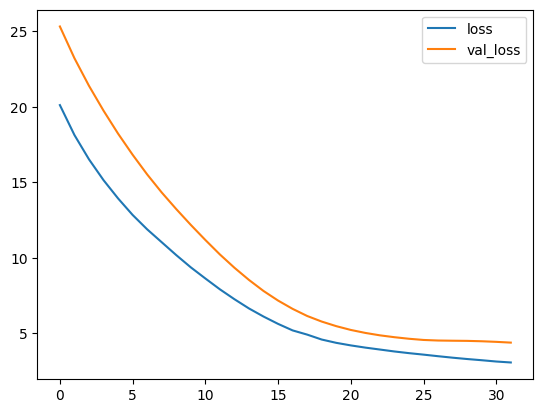

In [429]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.legend()

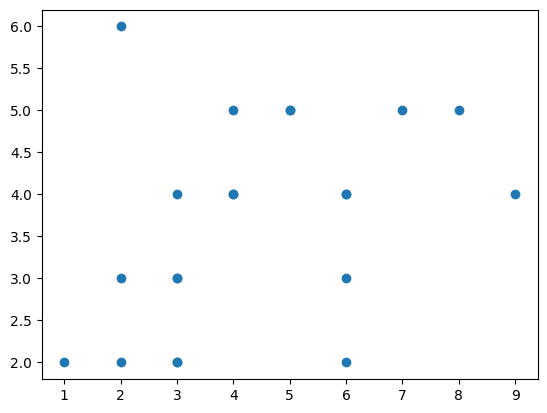

In [430]:
plt.scatter(y_test, yhat_test)

In [452]:
model1 = Sequential()

model1.add(Dense(128, activation='tanh', input_shape=x_train.shape[1:]))

model1.add(Dense(16, activation='relu'))

model1.add(Dense(1, 'linear'))

In [453]:
model1.compile(optimizer='adam', loss='mse')

In [454]:
results1 = model1.fit(x_train_nrm, y_train, epochs=32, validation_data=(x_test_nrm, y_test))

Epoch 1/32
3/3 [==============================] - 1s 76ms/step - loss: 17.5857 - val_loss: 23.2722
Epoch 2/32
3/3 [==============================] - 0s 16ms/step - loss: 16.2700 - val_loss: 21.6373
Epoch 3/32
3/3 [==============================] - 0s 17ms/step - loss: 15.1129 - val_loss: 20.2432
Epoch 4/32
3/3 [==============================] - 0s 26ms/step - loss: 14.1121 - val_loss: 18.9285
Epoch 5/32
3/3 [==============================] - 0s 18ms/step - loss: 13.1891 - val_loss: 17.7501
Epoch 6/32
3/3 [==============================] - 0s 22ms/step - loss: 12.3882 - val_loss: 16.6305
Epoch 7/32
3/3 [==============================] - 0s 27ms/step - loss: 11.6134 - val_loss: 15.5646
Epoch 8/32
3/3 [==============================] - 0s 27ms/step - loss: 10.8933 - val_loss: 14.5090
Epoch 9/32
3/3 [==============================] - 0s 20ms/step - loss: 10.2664 - val_loss: 13.4795
Epoch 10/32
3/3 [==============================] - 0s 20ms/step - loss: 9.5912 - val_loss: 12.5704
Epoch 11/3

In [455]:
model1.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 128)               1664      
                                                                 
 dense_173 (Dense)           (None, 16)                2064      
                                                                 
 dense_174 (Dense)           (None, 1)                 17        
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [456]:
yhat_test1 = model1.predict(x_test_nrm).round()

1/1 [==============================] - 0s 91ms/step


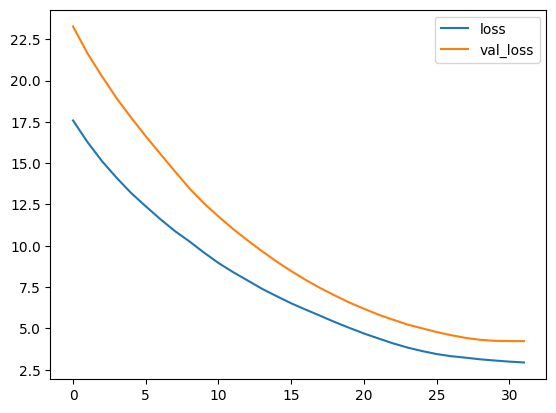

In [457]:
plt.plot(results1.history["loss"], label="loss")
plt.plot(results1.history["val_loss"], label="val_loss")

plt.legend()

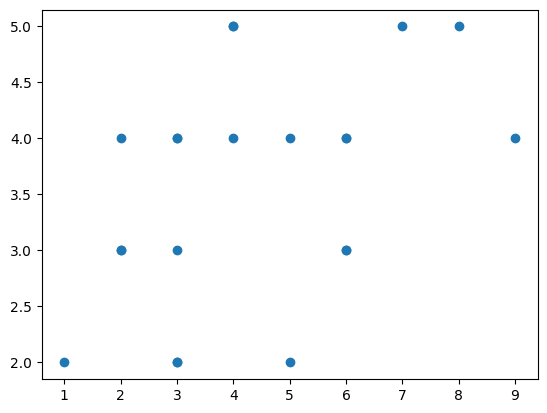

In [458]:
plt.scatter(y_test, yhat_test1)

In [459]:
model2 = Sequential()

model2.add(Dense(128, activation='tanh', input_shape=x_train.shape[1:]))

model2.add(Dense(64, activation='tanh'))

model2.add(Dense(16, activation='relu'))

model2.add(Dense(1, 'linear'))

In [460]:
model2.compile(optimizer='adam', loss='mse')

In [461]:
results2 = model2.fit(x_train_nrm, y_train, epochs=32, validation_data=(x_test_nrm, y_test))

Epoch 1/32
3/3 [==============================] - 2s 152ms/step - loss: 14.1367 - val_loss: 17.9217
Epoch 2/32
3/3 [==============================] - 0s 30ms/step - loss: 11.9367 - val_loss: 15.3836
Epoch 3/32
3/3 [==============================] - 0s 27ms/step - loss: 10.1719 - val_loss: 13.2076
Epoch 4/32
3/3 [==============================] - 0s 23ms/step - loss: 8.6340 - val_loss: 11.4226
Epoch 5/32
3/3 [==============================] - 0s 25ms/step - loss: 7.4176 - val_loss: 9.9354
Epoch 6/32
3/3 [==============================] - 0s 34ms/step - loss: 6.3832 - val_loss: 8.6761
Epoch 7/32
3/3 [==============================] - 0s 25ms/step - loss: 5.5424 - val_loss: 7.5430
Epoch 8/32
3/3 [==============================] - 0s 24ms/step - loss: 4.8748 - val_loss: 6.5474
Epoch 9/32
3/3 [==============================] - 0s 26ms/step - loss: 4.3333 - val_loss: 5.7215
Epoch 10/32
3/3 [==============================] - 0s 33ms/step - loss: 3.9101 - val_loss: 5.0788
Epoch 11/32
3/3 [====

In [462]:
model2.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 128)               1664      
                                                                 
 dense_176 (Dense)           (None, 64)                8256      
                                                                 
 dense_177 (Dense)           (None, 16)                1040      
                                                                 
 dense_178 (Dense)           (None, 1)                 17        
                                                                 
Total params: 10,977
Trainable params: 10,977
Non-trainable params: 0
_________________________________________________________________


In [463]:
yhat_test2 = model2.predict(x_test_nrm).round()

1/1 [==============================] - 0s 80ms/step


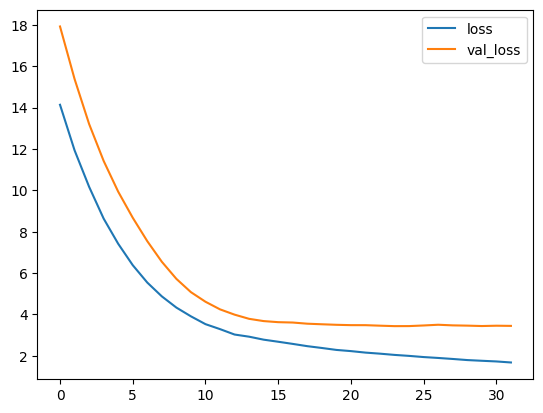

In [464]:
plt.plot(results2.history["loss"], label="loss")
plt.plot(results2.history["val_loss"], label="val_loss")

plt.legend()

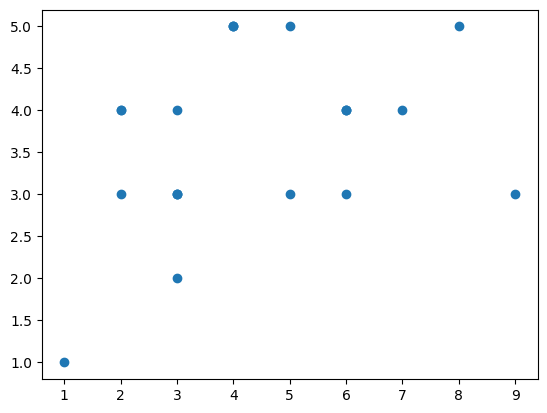

In [444]:
plt.scatter(y_test, yhat_test2)

In [445]:
model3 = Sequential()

model3.add(Dense(128, activation='tanh', input_shape=x_train.shape[1:]))

model3.add(Dense(64, activation='tanh'))

model3.add(Dense(32, activation='tanh'))

model3.add(Dense(16, activation='tanh'))

model3.add(Dense(1, 'linear'))

In [446]:
model3.compile(optimizer='adam', loss='mse')

In [447]:
results3 = model3.fit(x_train_nrm, y_train, epochs=32, validation_data=(x_test_nrm, y_test))

Epoch 1/32
3/3 [==============================] - 4s 192ms/step - loss: 16.6546 - val_loss: 21.5888
Epoch 2/32
3/3 [==============================] - 0s 51ms/step - loss: 15.6472 - val_loss: 20.7621
Epoch 3/32
3/3 [==============================] - 0s 47ms/step - loss: 14.8981 - val_loss: 20.1576
Epoch 4/32
3/3 [==============================] - 0s 71ms/step - loss: 14.1684 - val_loss: 19.2527
Epoch 5/32
3/3 [==============================] - 0s 37ms/step - loss: 13.4342 - val_loss: 18.4064
Epoch 6/32
3/3 [==============================] - 0s 37ms/step - loss: 12.6505 - val_loss: 17.5286
Epoch 7/32
3/3 [==============================] - 0s 70ms/step - loss: 11.7391 - val_loss: 16.7847
Epoch 8/32
3/3 [==============================] - 0s 72ms/step - loss: 10.7661 - val_loss: 15.7461
Epoch 9/32
3/3 [==============================] - 0s 85ms/step - loss: 9.6809 - val_loss: 14.5243
Epoch 10/32
3/3 [==============================] - 0s 61ms/step - loss: 8.4143 - val_loss: 13.0641
Epoch 11/3

In [448]:
model3.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 128)               1664      
                                                                 
 dense_168 (Dense)           (None, 64)                8256      
                                                                 
 dense_169 (Dense)           (None, 32)                2080      
                                                                 
 dense_170 (Dense)           (None, 16)                528       
                                                                 
 dense_171 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [449]:
yhat_test3 = model3.predict(x_test_nrm).round()

1/1 [==============================] - 0s 86ms/step


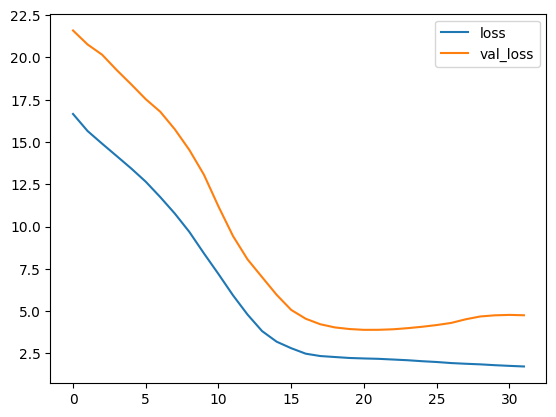

In [450]:
plt.plot(results3.history["loss"], label="loss")
plt.plot(results3.history["val_loss"], label="val_loss")

plt.legend()

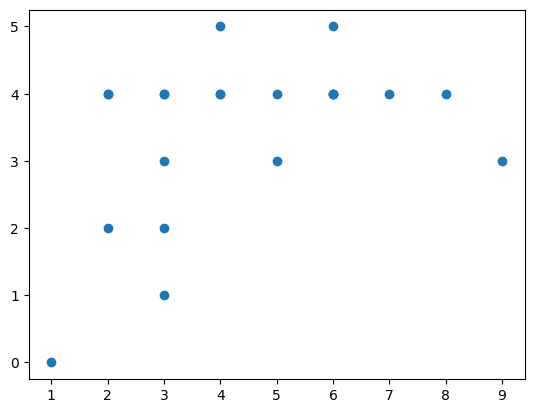

In [451]:
plt.scatter(y_test, yhat_test3)